# Regression between sea level height and the timmerman wind data regions for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [135]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Smoothed analysis/code')

import import_data as imprt
import regression as regres
import figures as figs


data_type = 'era5'
model = 'Timmerman'

window = 21

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [136]:
# Open data file
tg_data = imprt.import_obs_slh_data(window = window)

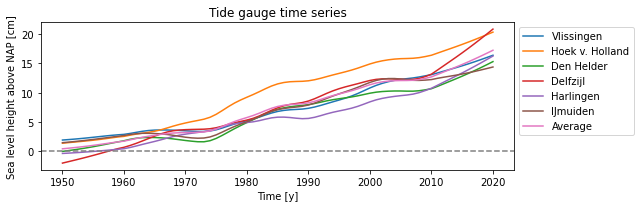

In [137]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [138]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = data_type, window = window)

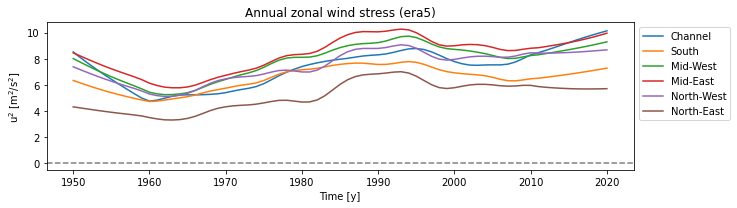

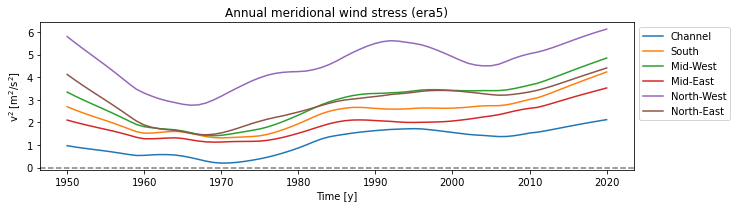

In [139]:
figs.plot_obs_wind_data(wind_data_era5, model = model, data_type = data_type)

### Perform regression

In [140]:
results_era5, timeseries_era5, significance_era5 = regres.regression_obs(wind_data_era5, tg_data, wind_model = model, data_type = data_type)

/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.178e-01, tolerance: 1.389e-01
  model = cd_fast.enet_coordinate_descent(


In [141]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend
station,,,,,,,,,,,,,,,,,,,
Vlissingen,0.999231,0.466545,0.273042,0.760284,0.122598,7.460060,0.000000,0.000000,-0.627935,0.432554,0.000000,0.821810,-0.000000,0.000000,0.000000,-0.909221,0.000000,0.818577,3.742809
Hoek v. Holland,0.999390,0.760365,0.502619,0.465828,0.145292,10.102493,-0.038785,0.157905,0.472285,0.000000,0.000000,0.533481,0.926065,0.000000,-0.413553,-1.012273,-0.000000,0.611557,4.902405
Den Helder,0.998277,0.850943,0.749057,0.888934,0.182155,6.402498,-0.143598,1.683271,0.000000,0.652115,0.000000,0.000000,0.356074,0.000000,-0.529643,-0.606344,-0.000000,-0.000000,3.029203
Delfzijl,0.987031,0.577553,0.555726,0.799833,0.670276,7.602202,0.000000,0.160309,0.104306,1.203715,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.433568,-0.548444,5.323677
Harlingen,0.997285,0.104300,0.079968,0.306216,0.230471,5.893476,-0.000000,-1.312096,0.144989,2.192729,0.716019,-0.000000,0.017996,0.000000,-0.000000,0.084639,-1.008439,-0.709278,4.222399
IJmuiden,0.999088,0.604026,0.052491,0.663977,0.132766,7.179520,-0.000000,1.733145,-0.749353,-0.000000,0.000000,0.000000,0.000000,-1.131722,0.000000,-1.911462,0.454886,2.447334,3.497477
Average,0.998312,0.724786,0.646434,0.786878,0.199995,7.431267,-0.000000,0.525888,0.000000,0.623805,0.052904,0.000000,0.000000,-0.000000,-0.122758,-0.547240,-0.100824,0.402529,4.110375


In [142]:
timeseries_era5

Vlissingen                                                       \
     Channel u$^2$ Channel v$^2$ South u$^2$ South v$^2$ Mid-West u$^2$   
time                                                                      
1950           0.0          -0.0    0.109113    0.186128            0.0   
1951           0.0          -0.0    0.252146    0.106118           -0.0   
1952           0.0          -0.0    0.389622    0.032067           -0.0   
1953          -0.0          -0.0    0.520988   -0.037664           -0.0   
1954          -0.0          -0.0    0.645216   -0.104661           -0.0   
...            ...           ...         ...         ...            ...   
2016           0.0           0.0   -0.283311    0.790901            0.0   
2017           0.0           0.0   -0.346144    0.866363            0.0   
2018           0.0           0.0   -0.411806    0.940203            0.0   
2019           0.0           0.0   -0.479876    1.013296            0.0   
2020           0.0           0.0   -0.551376    1.087103            0.0   

                                                                    \
     Mid-West v$^2$ Mid-East u$^2$ Mid-East v$^2$ North-West u$^2$   
time                                                                 
1950       0.424671           -0.0            0.0             -0.0   
1951       0.273315            0.0            0.0             -0.0   
1952       0.130041            0.0           -0.0             -0.0   
1953      -0.007981            0.0           -0.0             -0.0   
1954      -0.142986            0.0           -0.0             -0.0   
...             ...            ...            ...              ...   
2016       1.325378           -0.0            0.0              0.0   
2017       1.437421           -0.0            0.0              0.0   
2018       1.546765           -0.0            0.0              0.0   
2019       1.654475           -0.0            0.0              0.0   
2020       1.762071           -0.0            0.0              0.0   

                       ...   Average                                           \
     North-West v$^2$  ...     trend     total wind total   Channel     South   
time                   ...                                                      
1950        -1.212299  ... -7.019802 -6.914790   0.105012 -0.155653  0.268424   
1951        -0.952159  ... -6.819236 -6.826838  -0.007602 -0.207902  0.153038   
1952        -0.701621  ... -6.618670 -6.724837  -0.106167 -0.253641  0.046245   
1953        -0.455757  ... -6.418105 -6.612703  -0.194599 -0.295418 -0.054317   
1954        -0.210796  ... -6.217539 -6.494244  -0.276705 -0.335604 -0.150937   
...               ...  ...       ...       ...        ...       ...       ...   
2016        -1.100300  ...  6.217539  7.825705   1.608166  0.701467  1.140593   
2017        -1.218893  ...  6.418105  8.182021   1.763916  0.760410  1.249420   
2018        -1.330787  ...  6.618670  8.535106   1.916436  0.816656  1.355908   
2019        -1.436560  ...  6.819236  8.887064   2.067828  0.870787  1.461318   
2020        -1.536914  ...  7.019802  9.240625   2.220823  0.923742  1.567758   

                                                            
      Mid-West Mid-East North-West u$^2$ total v$^2$ total  
time                                                        
1950  0.007375      0.0  -0.723853    0.091397    0.013614  
1951 -0.004647      0.0  -0.542696    0.111957   -0.119559  
1952 -0.016390      0.0  -0.367799    0.132331   -0.238498  
1953 -0.027756      0.0  -0.196519    0.152070   -0.346669  
1954 -0.038628      0.0  -0.026872    0.170815   -0.447520  
...        ...      ...        ...         ...         ...  
2016  0.039333      0.0  -0.774123   -0.120942    1.729108  
2017  0.043923      0.0  -0.849372   -0.119468    1.883384  
2018  0.048782      0.0  -0.921109   -0.119020    2.035456  
2019  0.053891      0.0  -0.989453   -0.119238    2.187066  
2020  0.059316      0.0  -1.054911   -0.120241  

In [143]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
Channel u$^2$,True,True,True,True,True,True,True
Channel v$^2$,True,True,True,True,True,True,True
South u$^2$,True,True,True,True,True,True,True
South v$^2$,True,True,True,True,True,True,True
Mid-West u$^2$,True,True,True,True,True,True,True
Mid-West v$^2$,True,True,True,True,True,True,True
Mid-East u$^2$,True,True,True,True,True,True,True
Mid-East v$^2$,True,True,True,True,True,True,True
North-West u$^2$,True,True,True,True,True,True,True


#### Plot regression results

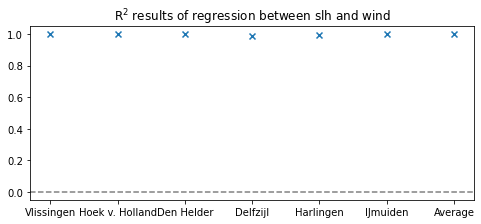

In [144]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, data_type)

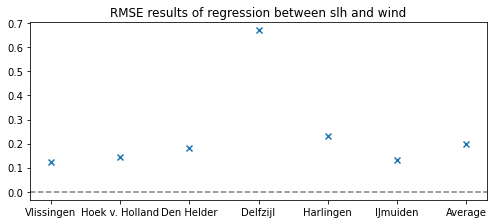

In [145]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, data_type)

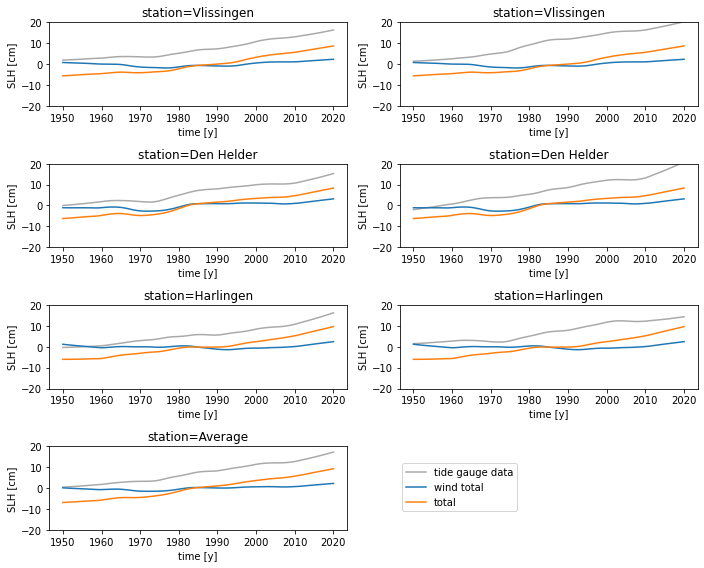

In [146]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total', 'total'], model, data_type)

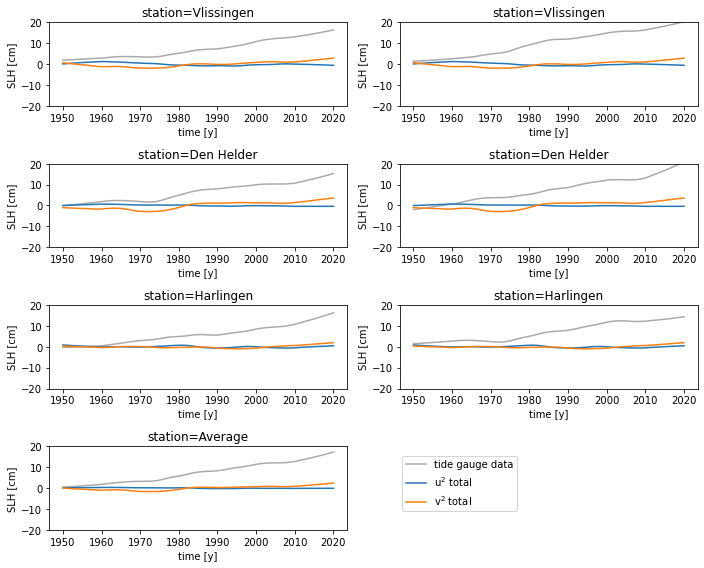

In [147]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$ total', 'v$^2$ total'], model, data_type)

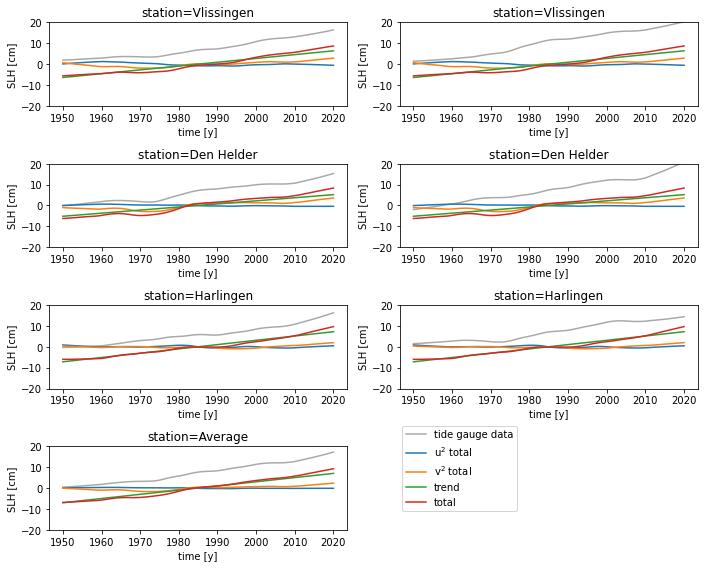

In [148]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

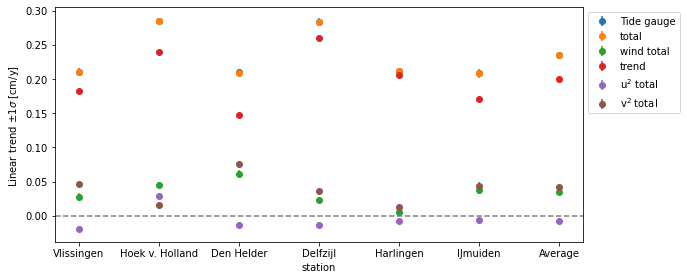

In [149]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

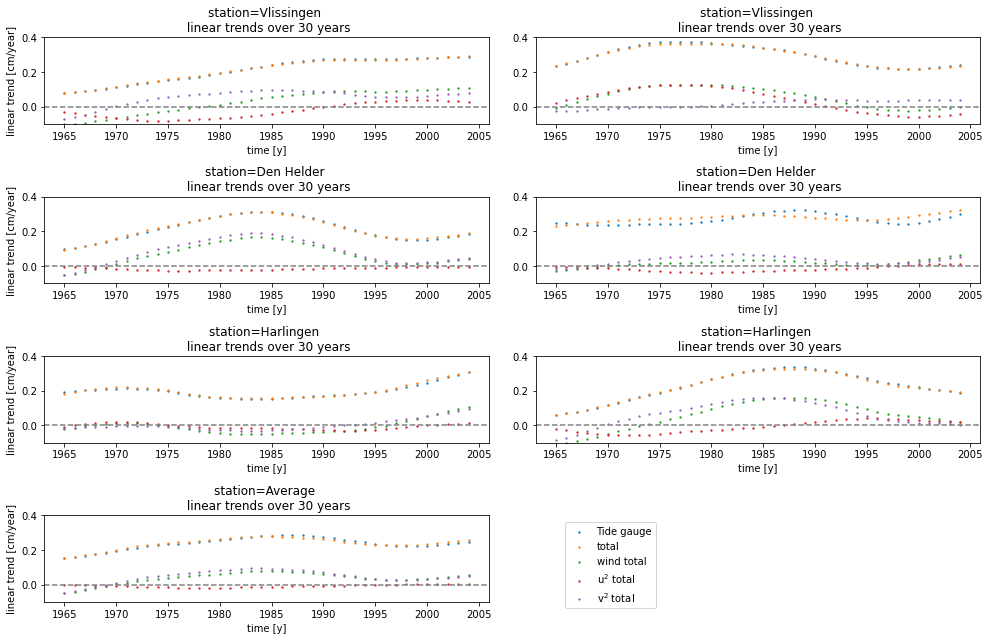

In [150]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)

## 20cr observational data

In [151]:
data_type = '20cr'

#### Import and plot tide gauge data

In [152]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = data_type, window = window)

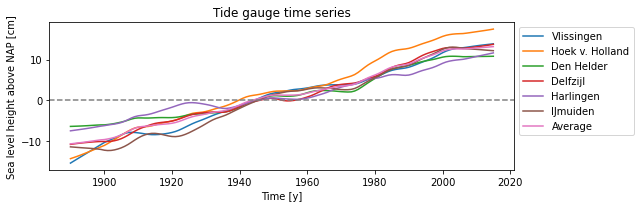

In [153]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [154]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = data_type, window = window)

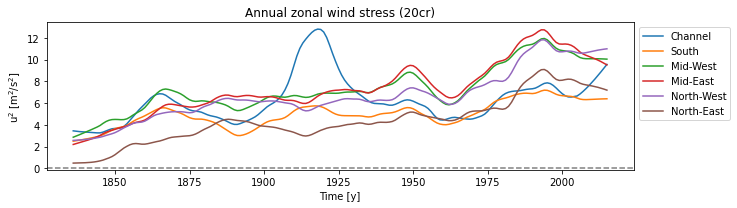

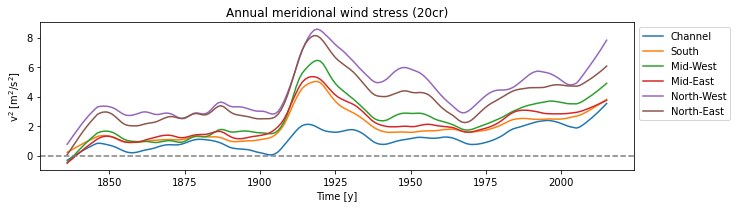

In [155]:
figs.plot_obs_wind_data(wind_data_20cr, model = model, data_type = data_type)

### Perform regression

In [156]:
results_20cr, timeseries_20cr, significance_20cr = regres.regression_obs(wind_data_20cr, tg_data, wind_model = model, data_type = data_type)

/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.039e-01, tolerance: 4.277e-01
  model = cd_fast.enet_coordinate_descent(
/Users/iriskeizer/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+00, tolerance: 8.636e-01
  model = cd_fast.enet_coordinate_descent(


In [157]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend
station,,,,,,,,,,,,,,,,,,,
Vlissingen,0.989955,0.029975,0.054397,0.000776,0.807464,-5.107174,0.000000,0.000000,0.356467,-0.702777,-0.000000,0.000000,-0.435241,0.0,-0.000000,0.340901,-0.000000,0.000000,11.486446
Hoek v. Holland,0.997172,0.744293,0.736423,0.484631,0.486928,-3.780617,-0.000000,0.129912,0.962262,-0.000000,0.601594,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,11.213555
Den Helder,0.995649,0.622080,0.225376,0.073034,0.384303,-2.619484,1.502531,0.893208,-0.316376,-2.351037,-0.463599,0.803656,0.545947,-0.0,0.135016,-1.988845,1.132149,1.527850,6.846044
Delfzijl,0.995887,0.804804,0.833276,0.087605,0.484953,-4.350139,-0.000000,0.124769,0.214456,0.120170,0.000000,0.000000,0.000000,0.0,0.000000,-0.000000,1.368535,0.248170,8.931030
Harlingen,0.989417,0.628234,0.780108,0.051931,0.542412,-2.426885,0.000000,-0.000000,0.005026,0.666325,0.000000,0.000000,0.000000,0.0,0.911375,0.000000,0.000000,0.000000,6.271909
IJmuiden,0.996781,0.071066,0.129469,0.138763,0.469697,-5.525774,0.560064,1.332200,2.132964,-5.234212,-3.135357,1.858264,0.000000,-0.0,-1.750062,-1.862656,2.589003,3.107950,11.507156
Average,0.997178,0.796968,0.822869,0.380265,0.390278,-4.021666,-0.000000,0.299053,0.376543,-0.625166,-0.000000,0.000000,-0.000000,-0.0,0.000000,-0.231665,0.654854,0.715467,9.196384


In [158]:
timeseries_20cr['Average']

,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,...,trend,total,wind total,Channel,South,Mid-West,Mid-East,North-West,u$^2$ total,v$^2$ total
time,,,,,,,,,,,,,,,,,,,,,
1836,0.0,-0.607939,-0.803723,1.036344,0.0,-0.0,0.0,0.0,-0.0,0.502295,...,-15.840356,-18.630806,-2.790450,-0.607939,0.232621,0.0,0.0,0.502295,-2.028145,-0.762305
1837,0.0,-0.553639,-0.790584,0.968226,0.0,-0.0,0.0,0.0,-0.0,0.462298,...,-15.663369,-18.353747,-2.690379,-0.553639,0.177642,0.0,0.0,0.462298,-2.012721,-0.677657
1838,0.0,-0.500326,-0.775816,0.899485,0.0,-0.0,0.0,0.0,-0.0,0.422708,...,-15.486381,-18.076134,-2.589752,-0.500326,0.123668,0.0,0.0,0.422708,-1.995346,-0.594406
1839,0.0,-0.448150,-0.760204,0.830827,0.0,-0.0,0.0,0.0,-0.0,0.383639,...,-15.309394,-17.799020,-2.489626,-0.448150,0.070623,0.0,0.0,0.383639,-1.977073,-0.512553
1840,0.0,-0.397205,-0.743928,0.762931,0.0,-0.0,0.0,0.0,-0.0,0.345408,...,-15.132407,-17.522530,-2.390123,-0.397205,0.019003,0.0,0.0,0.345408,-1.957623,-0.432500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,-0.0,0.640778,0.446906,-0.791074,-0.0,0.0,-0.0,-0.0,0.0,-0.292314,...,15.132407,16.837805,1.705398,0.640778,-0.344168,0.0,0.0,-0.292314,1.428690,0.276708
2012,-0.0,0.717958,0.451187,-0.867103,-0.0,0.0,-0.0,-0.0,0.0,-0.333599,...,15.309394,17.026970,1.717576,0.717958,-0.415916,0.0,0.0,-0.333599,1.411691,0.305885
2013,-0.0,0.798662,0.454740,-0.944106,-0.0,0.0,-0.0,-0.0,0.0,-0.376161,...,15.486381,17.217839,1.731457,0.798662,-0.489366,0.0,0.0,-0.376161,1.390946,0.340511


In [159]:
significance_20cr.T

reggression_contributor,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend,total,wind total
Vlissingen,False,True,True,False,True,False,True,False,True,False,True,False,True,True,False
Hoek v. Holland,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Den Helder,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Delfzijl,False,True,True,False,True,True,True,False,True,False,True,False,True,True,True
Harlingen,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True
IJmuiden,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True
Average,False,True,True,False,True,False,True,False,True,False,True,False,True,True,True


#### Plot regression results

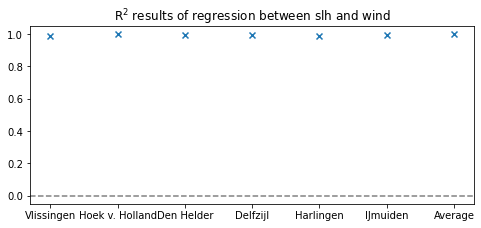

In [160]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, data_type)

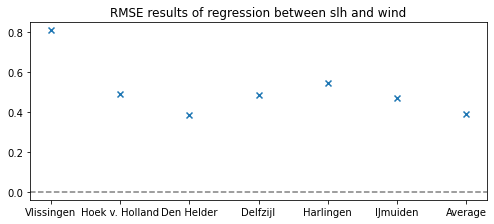

In [161]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, data_type)

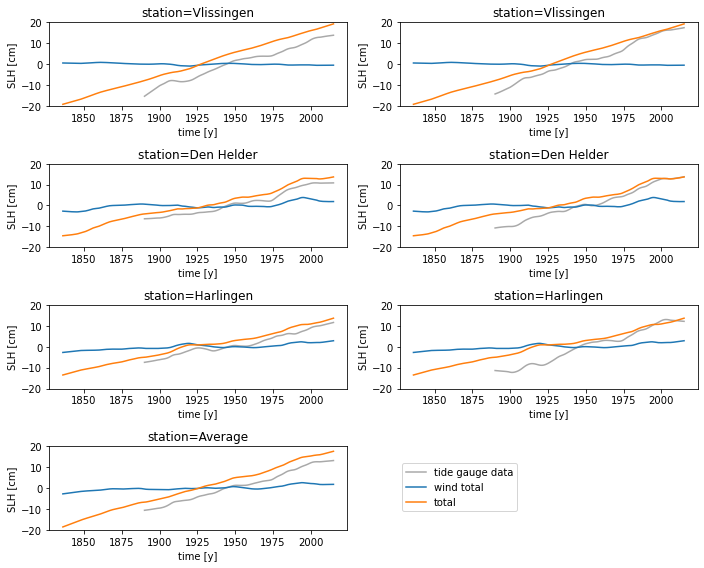

In [162]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total', 'total'], model, data_type)

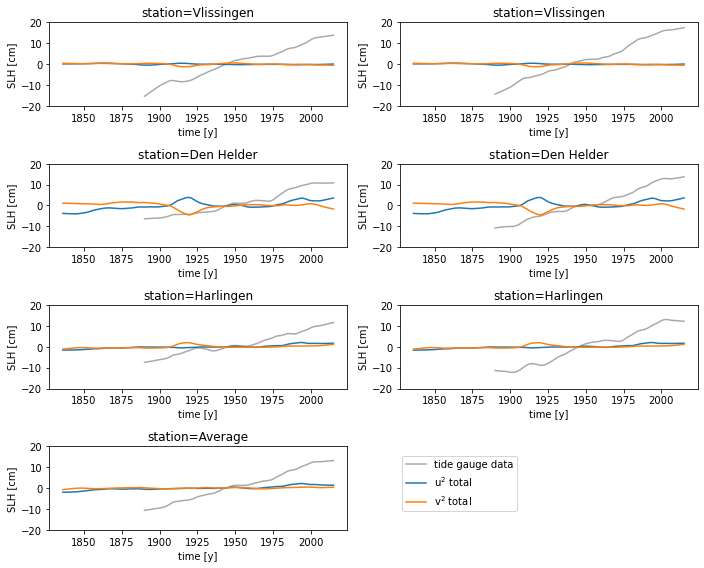

In [163]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total'], model, data_type)

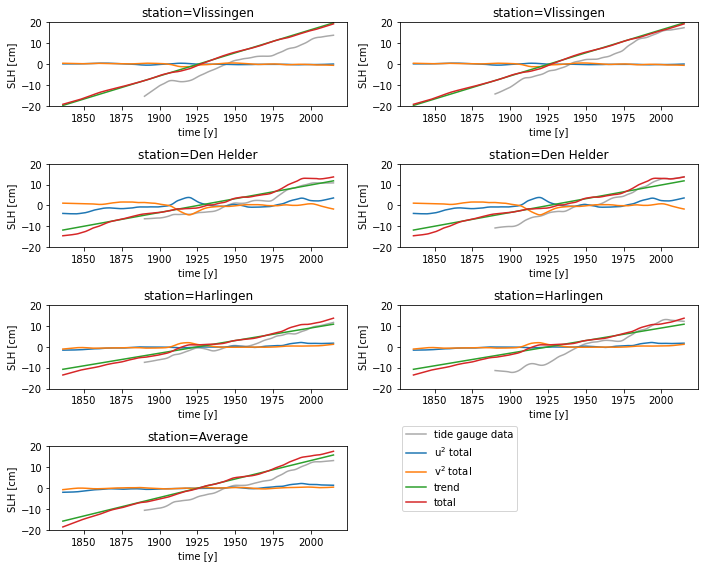

In [164]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

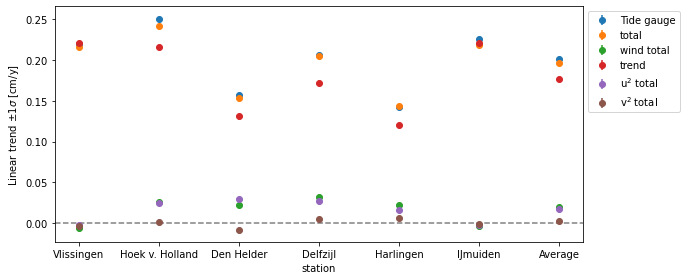

In [165]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

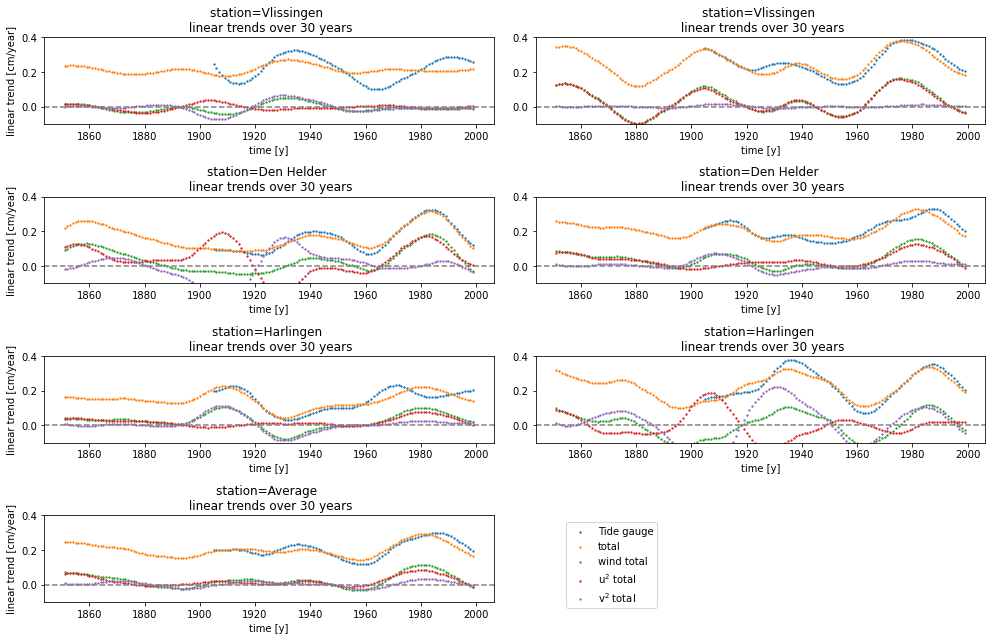

In [166]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)